In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("House_train.csv") #_all_dum

In [3]:
train = train[(train.GrLivArea < 4600)]

In [4]:
from math import log10
train.SalePrice = train.SalePrice.apply(lambda x: log10(x))

In [5]:
#excludes the insignificant categorials  , 
y = train.SalePrice.values
X = train.drop(["SalePrice", "Id", 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

c:\programdata\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
#Ridge Regression
from sklearn import linear_model
regressor = linear_model.Ridge(alpha=11, solver = 'lsqr')
regressor.fit(X_train, y_train)
y_predR = regressor.predict(X_train)
y_predRt = regressor.predict(X_predict)

In [99]:
len(y_predR), len(y_predL), len(y_predLR), len(y_predRF), len(y_train)

(1312, 1312, 1312, 1312, 1312)

In [98]:
len(np.transpose(y_train))

1312

In [10]:
#Lasso Regression
regressor1 = linear_model.Lasso()
regressor1.fit(X_train, y_train)
y_predL = regressor1.predict(X_train)
y_predLt = regressor1.predict(X_predict)

In [11]:
#Linear Regression
regressor2 = linear_model.LinearRegression()
regressor2.fit(X_train, y_train)
y_predLR = regressor2.predict(X_train)
y_predLRt = regressor2.predict(X_predict)

In [41]:
from sklearn.svm import SVR
regressor4 = SVR()
regressor4.fit(X_train, y_train)
y_predSVR = regressor4.predict(X_train)
y_predSVRt = regressor4.predict(X_predict)

In [18]:
#2nd Layer Model
X1 = pd.DataFrame([y_predRt, y_predLRt, y_predLt]).values
regressor2ndL = linear_model.LinearRegression()
regressor2ndL.fit(np.transpose(X1), np.transpose(y_train))

ValueError: Found input variables with inconsistent numbers of samples: [1459, 1312]

In [19]:
X1 = pd.DataFrame([np.transpose(y_predRt), np.transpose(y_predLRt), np.transpose(y_predLt)])
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
0,5.062239,5.203856,5.250034,5.307288,5.279841,5.247112,5.227101,5.228856,5.265592,5.052193,...,4.926305,4.979604,5.143318,4.963587,4.931362,4.947180,4.971815,5.201191,5.032634,5.365363
1,5.047797,5.206767,5.244446,5.307834,5.288367,5.219007,5.246288,5.207916,5.272971,5.054142,...,4.909428,4.911066,5.169070,4.882594,4.882645,4.926846,4.895368,5.206809,5.075762,5.348634
2,5.087227,5.239679,5.230187,5.225241,5.222683,5.208268,5.187349,5.177354,5.237200,5.084638,...,4.880457,5.069037,5.208965,5.069037,4.952261,4.952261,5.069037,5.203260,4.987686,5.309788


In [133]:
X1_pred = pd.DataFrame([y_predRt, y_predLRt]).values
y_pred2ndL = regressor2ndL.predict(np.transpose(X1_pred))

In [134]:
y_pred2ndL

array([5.05653027, 5.20812514, 5.24853723, ..., 5.20424091, 5.08245584,
       5.34759906])

In [13]:
names = train.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).columns

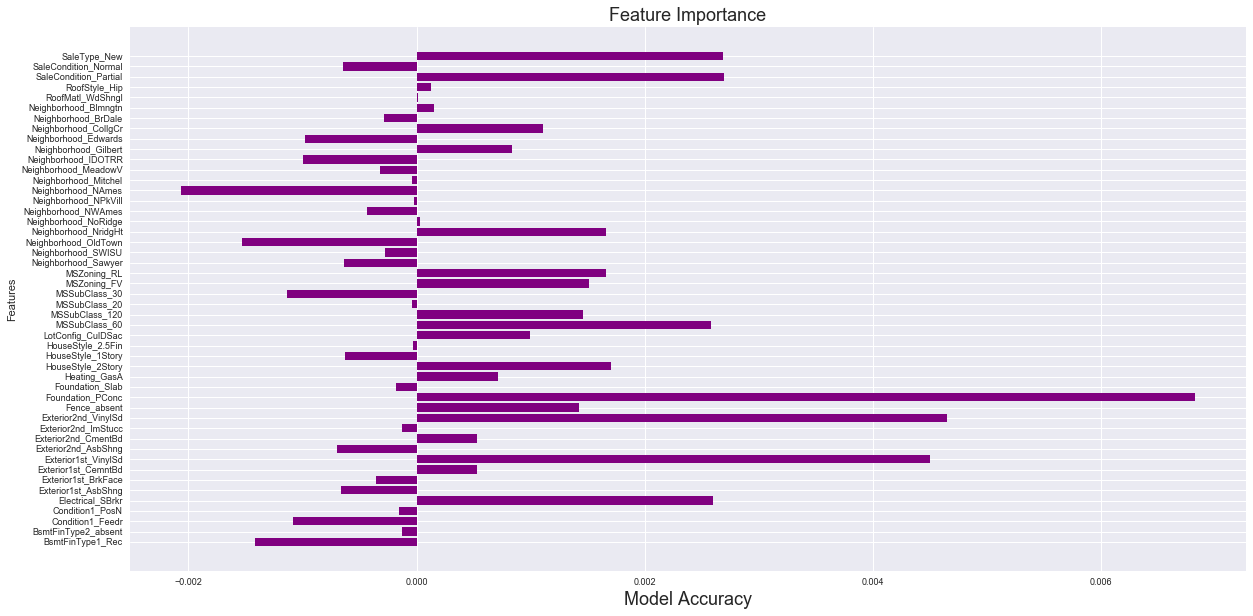

In [17]:
importance = regressor.coef_
imp = importance[46:]
pos = np.arange(len(imp))
plt.figure(figsize=(20,10))
plt.barh(pos, imp, align='center', color = 'purple')
plt.title("Feature Importance", fontsize = 18)
plt.xlabel("Model Accuracy", fontsize = 18)
plt.ylabel("Features")
plt.yticks(pos, names[46:])
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True)

In [196]:
features_f = pd.DataFrame(abs(importance), names).reset_index()
features_f.columns = ['Features', 'Score']
features_todrop = features_f[features_f['Score'] < 0.00005]['Features'].tolist()
#len(features_todrop)  #30
features_f.sort_values(by='Score', ascending=False)

,Features,Score
19,OverallQual,0.022402
12,HeatingQC,0.013111
13,KitchenQual,0.011255
33,OpenPorchSF1,0.010882
3,BsmtQual,0.010584
18,OverallCond,0.009938
9,GarageFinish,0.009561
2,BsmtExposure,0.009110
11,GarageType,0.009034
5,ExterQual,0.008768


In [194]:
X.shape

(1458, 83)

In [204]:
drop_scores = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]
features_todrop1 = []
num_feat_drop = []
rm_scores = []
for drop_score in drop_scores:
    feat = features_f[features_f['Score'] < drop_score]['Features'].tolist()
    features_todrop1.append(feat)
    num_feat_drop.append(len(feat))
    X = train.drop(["SalePrice", "Id"], axis = 1).drop(feat, axis = 1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    rm_scores.append(rmse_cv(linear_model.Ridge(alpha = 11, solver = 'auto')).mean())

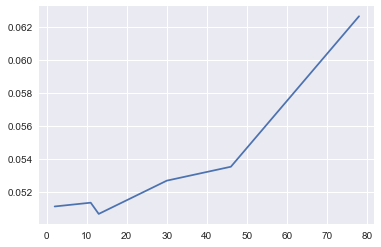

In [205]:
plt.plot(num_feat_drop, rm_scores)

# RMean square error calculation and model tuning

In [9]:
from sklearn.model_selection import cross_val_score
def rmse_cv(regr):
    rmse= np.sqrt(-cross_val_score(regr, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [135]:
#alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas = [5, 6, 7, 8, 9, 10, 11, 15, 20, 30, 40]
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
ridge_fr = pd.DataFrame({'alpha': [], 'auto' : [], 'svd' : [], 'cholesky' : [], 'lsqr' : [], 'sparse_cg' : [], 'sag' : []})
for solver in solvers:
    ridgelist = []
    for alpha in alphas:
        ridgelist.append(rmse_cv(linear_model.Ridge(alpha = alpha, solver = solver)).mean())
    ridge_fr[solver] = ridgelist
ridge_fr['alpha'] = alphas

In [13]:
ridge_fr

,alpha,auto,cholesky,lsqr,sag,sparse_cg,svd
0,NaN,0.052319,0.052271,0.06117,0.085599,0.061169,0.052288


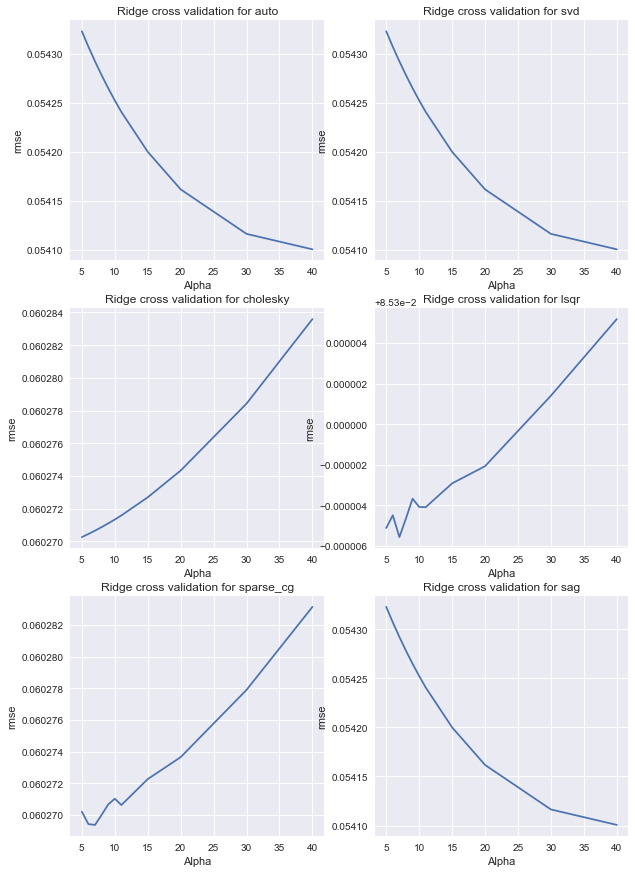

In [136]:
col_ = [0, 0, 1, 0, 1, 0, 1]
row_ = [0, 0, 0, 1, 1, 2, 2]
solvers = [0, 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
fig, axes = plt.subplots(3,2, figsize=(10,15), squeeze=False) 
for i in range(1, 7):
    r = row_[i]
    c = col_[i]
    axes[r, c].plot(ridge_fr['alpha'], ridge_fr.iloc[:, i] )
    axes[r, c].set_title('Ridge cross validation for %s' %solvers[i])
    axes[r, c].set_xlabel('Alpha')
    axes[r, c].set_ylabel('rmse')


In [119]:
#Optimal parameters for Ridge regression
regressor = linear_model.Ridge(alpha=ridge_fr.iloc[ridge_fr['auto'].idxmin(), 0], solver = 'auto')
regressor.fit(X_train, y_train)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# Fitting to test set

In [8]:
test = pd.read_csv("House_test.csv")
X_predict = test.drop(["SalePrice", "Id", 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values

In [135]:
#y_pred = regressor.predict(X_predict)
y_pred1 = [pow(10,x) for x in y_pred2ndL]

In [53]:
y_av = (y_predRt + y_predSVRt)/2 # + y_predLt)/3
y_pred1 = [pow(10,x) for x in y_av]

In [54]:
# y_predLt made significantly worse

In [55]:
pred = pd.DataFrame(test.Id, columns=['Id', 'SalePrice'])
pred.SalePrice = y_pred1

In [56]:
pred.head()

,Id,SalePrice
0,1461,139392.392737
1,1462,165277.890463
2,1463,174302.512461
3,1464,186178.904868
4,1465,180381.029612


In [57]:
pred.to_csv("Houses_prediction.csv", index = False)

In [58]:
pred

,Id,SalePrice
0,1461,139392.392737
1,1462,165277.890463
2,1463,174302.512461
3,1464,186178.904868
4,1465,180381.029612
5,1466,173717.060645
6,1467,169760.649409
7,1468,170101.174382
8,1469,177452.759262
9,1470,133327.889803
